In [14]:
import glob
import spectral
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pandas 
import os
import pandas as pd
import glob
import numpy as np

## 数据准备流程

### 更改文件后缀由spe为raw，使其可读
（杭州高谱相机需要）

In [4]:
# # 先更改spe为raw，让文件可读取
# import os
# files = glob.glob(rf'I:\experiment_data\大烟叶\*\*\*.spe')
# # 遍历文件夹中的文件
# for filename in files:
#   new_filepath = filename.replace('spe','raw')
#   os.rename(filename, new_filepath)

### 输出对应png图像，提供标注

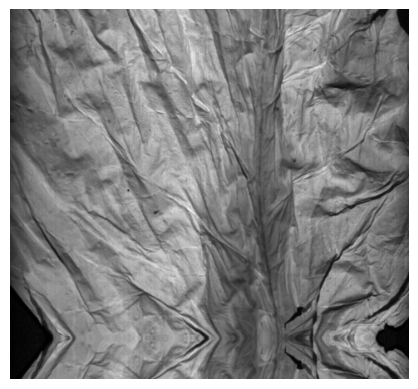

In [5]:
# files = glob.glob(rf'I:\experiment_data\大烟叶\*\*\*.hdr')
# save_folder_path = r'I:\experiment_data\大烟叶\labels'

# for file in files  :
#   msi = spectral.open_image(file).load()
#   file_name = os.path.dirname(file)
#   file_name = os.path.basename(file_name)
#   bianhao  =  os.path.basename(file)
#   combined_path = os.path.join(save_folder_path, os.path.basename(os.path.dirname(os.path.dirname(file))) + file_name + bianhao[:-4] )

#   plt.imshow(msi[:,:,210], cmap='gray')
#   plt.axis('off')
#   plt.savefig(combined_path , dpi=msi.shape[0] , bbox_inches='tight' , pad_inches=0)


### 测试用例

In [2]:
from LineSweep import get_spectral_split , read_hsi , read_roi , get_reflect_line_sweep

d:\Anaconda\envs\spe\Lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


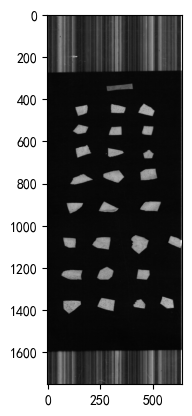

In [40]:
files = glob.glob(rf'H:\CHENPI0605\*\*_ref.hdr')
msi = read_hsi(files[0])
plt.imshow(msi[:,:,155], cmap='gray')

In [5]:
files_mask = glob.glob(r'H:\CHENPI0605\*.txt')
files_roi = [file for file in files_mask if 'classes.txt' not in file ] 
rois = read_roi(files_roi[0]) #输入标注文件地址，读取ROI,为【labels , x , y  ,w  h 】 的格式，xy为左上角坐标，wh为宽和高，都是小数形式
print(rois)


[['14', 0.1671875, 0.37910900000000003, 0.059375, 0.015376], ['14', 0.43906249999999997, 0.383351, 0.065625, 0.013786], ['14', 0.7343744999999999, 0.3822905, 0.057813, 0.020679], ['21', 0.1609375, 0.45917300000000005, 0.053125, 0.015376], ['21', 0.4109375, 0.46447499999999997, 0.059375, 0.014846], ['21', 0.714062, 0.4772, 0.085938, 0.013786], ['15', 0.134375, 0.537646, 0.045312, 0.015376], ['15', 0.40156250000000004, 0.5307529999999999, 0.059375, 0.015376], ['15', 0.723438, 0.5323439999999999, 0.051562, 0.015376], ['16', 0.159375, 0.5864265000000001, 0.025, 0.011135], ['16', 0.4062505, 0.5959705000000001, 0.040625, 0.012195], ['16', 0.709375, 0.593849, 0.075, 0.013786], ['17', 0.15, 0.6341465000000001, 0.054688, 0.011135], ['17', 0.41250000000000003, 0.648993, 0.026562, 0.010074], ['17', 0.765625, 0.658006, 0.042188, 0.013786], ['18', 0.1593755, 0.708377, 0.065625, 0.008484], ['18', 0.4109375, 0.716861, 0.059375, 0.015376], ['18', 0.760937, 0.7253445, 0.048438, 0.017497], ['19', 0.1750

(np.float64(-0.5), np.float64(639.5), np.float64(1701.5), np.float64(-0.5))

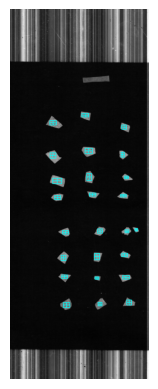

In [38]:
spectrum , labels = get_spectral_split( rois , msi ,True , rows =2 , columns= 2 )
plt.axis('off')

### 批量运行


In [75]:
import glob
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bar
import matplotlib.pyplot as plt

# import importlib
# importlib.reload(LineSweep)
from LineSweep import get_spectral_split , read_hsi , read_roi , get_reflect_line_sweep

# File paths
files = glob.glob(rf'H:\CHENPI0605\*\*_ref.hdr')
files_mask = glob.glob(r'H:\CHENPI0605\*.txt')

files_roi = [file for file in files_mask if 'classes.txt' not in file]
rows=2
columns=2

spectrum_data = []
labels = []

# Use tqdm to create a progress bar for the loop
for i in tqdm(range(len(files_roi)), desc="Processing Files"):

    rois = read_roi(files_roi[i])  # 输出对应图像的ROI， 格式是【【labels，x , y , w  ,h】】
    
    # msi = read_hsi(files[i])  # 输出对应的高光谱图像

    #索引到ROI文件对应的图像，名字能一一对应
    msi_name = [flie for flie in files if os.path.basename(files_roi[i]).split('.')[0] in flie][0]
    msi = read_hsi(msi_name)

    spectrum, label = get_spectral_split(rois, msi, rows=rows, columns=columns)  # 输出光谱图像， roi ， 目标roi的labels 输出希望的光谱, 使用阈值分割的方法

    spectrum_data.append(np.array(spectrum))

    labels.append(np.array(label).reshape(-1))

labels = np.concatenate(labels)
spectrum_data = np.concatenate(spectrum_data)
spectrum_data = spectrum_data.reshape(-1,spectrum_data.shape[2])

Processing Files:   0%|          | 0/4 [00:00<?, ?it/s]d:\Anaconda\envs\spe\Lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
Processing Files: 100%|██████████| 4/4 [04:02<00:00, 60.50s/it]


### 查看数据
把数据的labels换成原本的标注的名字

In [76]:
# 读取labels命名文件
files_name = [file for file in files_mask if 'classes.txt' in file ] 
# 打开文本文件
with open(files_name[0], 'r' , encoding='gbk') as file:
    # 读取文件的所有行
    lines = file.readlines()
# 去除每行末尾的换行符
lines = [line.strip() for line in lines]

labels_name = labels
# 替换名字
for i in range(len(lines)) :
  labels_name = np.where(labels_name == str(i), lines[i], labels_name)


# 生成csv文档保存数据
spectrum_data_pd = pd.DataFrame(spectrum_data)
spectrum_data_pd.index = labels_name

# 使用 spectral 库读取元数据
img = spectral.open_image(files[0])
# 提取波长信息
wavelengths = img.metadata['wavelength']

wavelengths = [float(i) for i in wavelengths]
spectrum_data_pd.columns = wavelengths
spectrum_data_pd.to_csv('陈皮原始反射光谱数据_split.csv')
spectrum_data_pd


d:\Anaconda\envs\spe\Lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


,886.96,888.50,890.05,891.60,893.14,894.70,896.25,897.80,899.36,900.92,...,1710.01,1711.67,1713.34,1715.00,1716.66,1718.32,1719.98,1721.64,1723.30,1724.96
H1,0.977808,0.972642,0.976110,0.973087,0.961604,0.944861,0.957109,0.921195,0.931412,0.929697,...,0.959849,0.975215,0.982048,0.979919,0.994794,0.995929,0.996088,0.998429,0.997778,1.000000
H1,0.968690,0.962017,0.962776,0.969724,0.954885,0.931694,0.944900,0.914410,0.927200,0.915276,...,0.951953,0.973156,0.974135,0.975113,0.992402,0.991199,0.994593,0.998243,0.996806,1.000000
H1,0.983905,0.963970,0.987603,0.976952,0.969057,0.947877,0.961040,0.931462,0.920451,0.928806,...,0.951592,0.973482,0.980416,0.989179,0.991506,0.994506,0.998593,0.998190,0.999176,0.999619
H1,0.979680,0.958765,0.984997,0.983244,0.970695,0.949603,0.946134,0.929658,0.926824,0.926778,...,0.951736,0.971403,0.974017,0.986187,0.990263,0.994934,0.998293,0.998372,0.997973,1.000000
H1,0.895812,0.872076,0.897159,0.876921,0.870339,0.835011,0.873936,0.824790,0.807055,0.821797,...,0.891273,0.915728,0.916789,0.948111,0.957541,0.974243,0.973879,0.986228,0.988932,0.995509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W14,0.833909,0.831074,0.842703,0.814026,0.814574,0.793021,0.790007,0.777138,0.762156,0.770273,...,0.723999,0.766675,0.774983,0.792004,0.822265,0.836198,0.892956,0.898364,0.921650,0.957383
W14,0.918574,0.913735,0.918990,0.915203,0.903880,0.874622,0.854646,0.840763,0.839770,0.831324,...,0.794492,0.821227,0.861475,0.901069,0.902946,0.941017,0.956932,0.965046,0.983994,0.991662
W14,0.926841,0.909783,0.926514,0.921541,0.915256,0.886815,0.872372,0.858864,0.849275,0.845254,...,0.803811,0.829296,0.864493,0.915930,0.922980,0.953070,0.963828,0.976520,0.988447,0.995449
W14,0.949839,0.938853,0.935675,0.920421,0.900342,0.887643,0.886073,0.864944,0.861228,0.856104,...,0.803051,0.838094,0.850087,0.899016,0.895130,0.952898,0.970869,0.976178,0.983144,0.994971


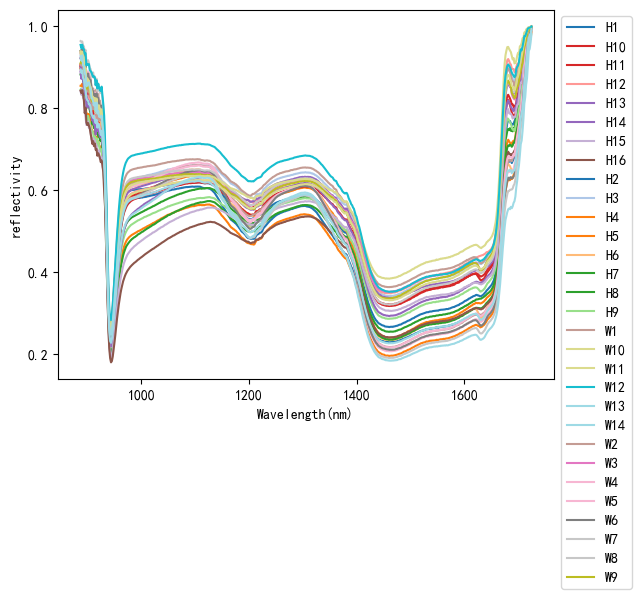

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from SpectrumAnalyse import plot_duplicate_data
from SpectrumAnalyse import split_data

category, split_datas = split_data(labels_name, spectrum_data)
plot_duplicate_data(category, split_datas, wavelengths, type='mean')

In [ ]:
# # 生成csv文档保存数据

# reflectance_pd = pd.DataFrame(reflectance)
# reflectance_pd.index = labels_name
# reflectance_pd.to_csv('宜茶反射率数据.csv')